## Schedule example

In the next step, we want to use schedules of a task graph to predict the runtime of a BlockIteration. At the moment, this package has two different schedules implemented

1) PinT Block-by-block: Typical PinT implementation for a given number of processes (link)
2) Optimal: An "optimal" scheduling strategy assuming an unlimited number of processes (link)

To show the different strategies, we first build a task graph using a BlockIteration. Here, we use Parareal with spatial coarsening from notebook 01:

In [1]:
%matplotlib notebook
from blockops import BlockOperator, BlockIteration, I
nBlocks = 4

g = BlockOperator('G', cost=1)  # coarse solver
f = BlockOperator('F', cost=10)  # fine solver
r = BlockOperator('R', cost=0.2)  # restriction
p = BlockOperator('P', cost=0.2)  # prolongation (interpolation)

rules = [(r*p, I)]

pararealSC = BlockIteration(
    "(f - p*g*r) u_{n}^k + p*g*r * u_{n}^{k+1}",  # block iteration update formula
    propagator=f, predictor="p*g*r",  # propagator and predictor
    rules=rules,  # list of rules (optional)
    f=f, p=p, g=g, r=r)  # definition of the block operator objects

We can now simpyl plot a scheduling using the function `plotSchedule`. First we want to plot the block-by-block schedule. Dafür benötigen wir eine Anzahl von Prozessen, welche wir identisch zu der Anzahl von Blöcken setzen:

<IPython.core.display.Javascript object>


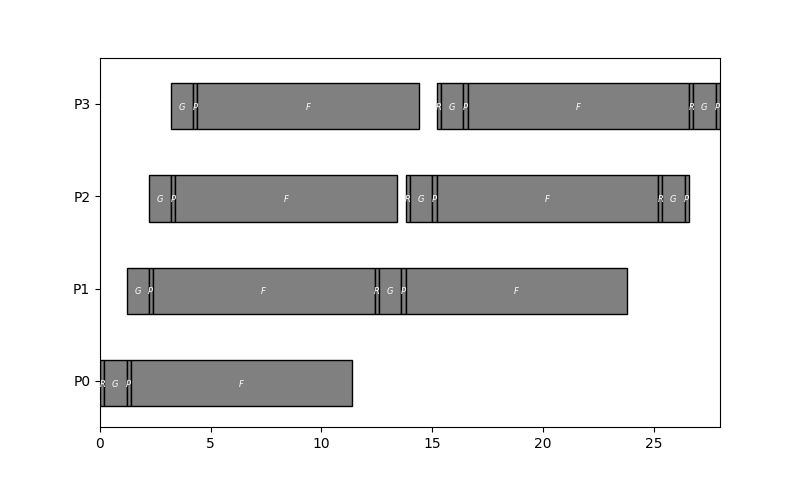

In [2]:
pararealSC.plotSchedule(N=nBlocks, K=[0, 1, 2, 2, 2], nProc=nBlocks, schedule_type='BLOCK-BY-BLOCK')

Now, we want to plot the optimal schedule.

**Note** : The number of processes for the optimal scheduler is not important. This scheduler assumes unlimited processes and ignores the given number of processes :

<IPython.core.display.Javascript object>


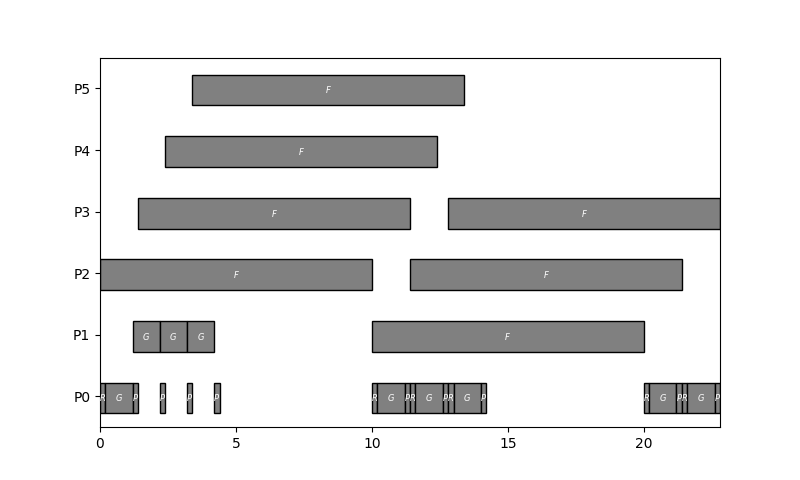

In [3]:
pararealSC.plotSchedule(N=nBlocks, K=[0, 1, 2, 2, 2], nProc=1000, schedule_type='OPTIMAL')